<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/polyhedron-gdl/advanced-machine-learning-for-finance/blob/main/2022/1-notebooks/chapter-3-4.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [96]:
import sys
import math
import pandas as pd
import numpy as np

from pickle import load
from tensorflow import keras

# NN Heston Model - How to use a Trained Model

## Auxiliary Functions

In [97]:
def show_scattered( y, t, tag, ax = None):

    xMin = min(t)
    xMax = max(t)
    v    = np.arange(xMin, xMax, (xMax-xMin)/100.)

    diff   = np.fabs(y - t)
    print("@ %-24s: E[y-t]: %.6f Std(y-t): %.6f" %( tag, np.mean(diff), np.std(diff)))
    if ax == None: return

    ax.plot( y, t, ".")
    ax.plot( v, v, color="red")
    ax.set_title("%s mae=%8.4f, std=%8.4f" %(tag, np.mean(diff), np.std(diff)))
    ax.set_xlabel("predicted")
    ax.set_ylabel("target")

## Constants

In [98]:
TAG = '100000_VFA'

inFile  = "test_%s.csv" % (TAG)
outFile = "pred_%s.csv" % TAG
    
scalerFile = "scaler_%s.pkl" %TAG
mdlDir     = "model_%s.krs" %TAG

print('Test File       : ', inFile)
print('Prediction File : ', outFile)
print('Scaler          : ', scalerFile)
print('Model           : ', mdlDir)

Test File       :  test_100000_VFA.csv
Prediction File :  pred_100000_VFA.csv
Scaler          :  scaler_100000_VFA.pkl
Model           :  model_100000_VFA.krs


## Reading Challenge Data and Trained Model

In [99]:
# Read in data to predict
print("@ %-24s: reading db from '%s'" %("Info", inFile))
db = pd.read_csv(inFile, sep=',')
print(db.head(5))

@ Info                    : reading db from 'test_100000_VFA.csv'
    k=0.800   k=0.825   k=0.850   k=0.875   k=0.900   k=0.925   k=0.950  \
0  0.416188  0.415128  0.414100  0.413104  0.412138  0.411200  0.410288   
1  0.813673  0.809089  0.804643  0.800331  0.796148  0.792089  0.788151   
2  0.630984  0.628509  0.626232  0.624145  0.622241  0.620514  0.618955   
3  0.755902  0.754133  0.752433  0.750798  0.749225  0.747710  0.746251   
4  0.788709  0.788299  0.787905  0.787526  0.787163  0.786812  0.786475   

    k=0.975   k=1.000   k=1.025   k=1.050   k=1.075   k=1.100   k=1.125  \
0  0.409402  0.408540  0.407702  0.406885  0.406089  0.405314  0.404557   
1  0.784329  0.780621  0.777023  0.773532  0.770145  0.766861  0.763676   
2  0.617556  0.616312  0.615214  0.614254  0.613426  0.612723  0.612138   
3  0.744846  0.743490  0.742182  0.740920  0.739702  0.738525  0.737389   
4  0.786150  0.785836  0.785533  0.785240  0.784957  0.784683  0.784418   

    k=1.150   k=1.175         T 

In [100]:
# load the model from file
print("@ %-24s: loading model from directory '%s'" %("Info", mdlDir))
model = keras.models.load_model(mdlDir)

@ Info                    : loading model from directory 'model_100000_VFA.krs'


In [101]:
scaler = load(open(scalerFile, 'rb'))
X = scaler.transform(db)

## Using the Trained Model to Predict

In [102]:
Y = model.predict(X)
Ydb = pd.DataFrame({"Price": Y[:,0]})

Ydb.to_csv(outFile, sep=',', float_format="%.6f", index=False)
print("@ %-24s: predictions written to '%s'" %("Info", outFile))

@ Info                    : predictions written to 'pred_100000_VFA.csv'


In [103]:
Y = np.ravel(Y)
print(Y.shape)

(32983,)


## Check Results

In [104]:
refFile = "trgt_%s.csv" % (TAG)
resFile = 'test_%s.jpg' % (TAG)
# read target file
t = pd.read_csv(refFile, sep=',')["Price"]
print(t.shape)

(32983,)


In [105]:
# the absolute error
x = np.fabs(Y-t)

# MAE: mean absolute error
m = np.mean(x)

# STD of absolute error
st = np.std(x)

@ 100000_VFA              : E[y-t]: 0.002954 Std(y-t): 0.003050
@ challenge file, saved to 'test_100000_VFA.jpg'


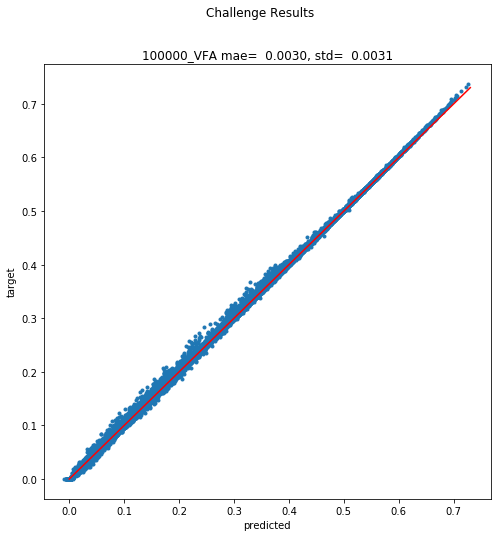

In [106]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt

fit = False
if fit: 
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    ox = ax[0]
    ux = ax[1]
else  : 
    fig, ax = plt.subplots(1,1, figsize=(8,8))   
    ox = ax
    ux = None

show_scattered(Y, t, TAG, ox)

if not ux == None: 
    df = pd.read_csv(refFile, sep=',')
    k  = df["Strike"]
    t  = df["Price"]
    ux.set_title("%s:  mae=%6.4f, std=%6.4f" %(TAG, m, st))
    ux.plot( k, t, ".", label="mkt")
    ux.plot( k, y, ".", label="NN")
    ux.set_xlabel("Strike")
    ux.set_ylabel("Price")
    ux.legend(loc="best")

fig.suptitle("Challenge Results")

print("@ challenge file, saved to '%s'" %(resFile))
plt.savefig(resFile, format="png")
plt.show()
